In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
air_temperature = pd.read_csv('India_air_temperature_2020.csv')
#print(air_temperature.head())

# remove the maximum temperature NaN values
air_temperature = air_temperature.dropna(subset=['Maximum Temperature'])
#print(air_temperature.head())
max_temperature = air_temperature['Maximum Temperature'].values

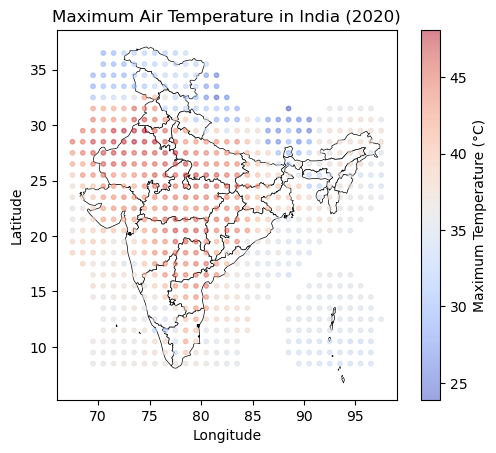

In [4]:
fp = '/Users/yifuding/Desktop/India_project_data/India_shape/india-polygon.shp'
States = gpd.GeoDataFrame.from_file(fp, crs="EPSG:4326")
ax = States.plot(edgecolor='k', color='white', linewidth=0.5)

# plot the max_temperature data as dots
plt.scatter(air_temperature['Longitude'], air_temperature['Latitude'], c=max_temperature, cmap='coolwarm', s=10, alpha=0.5)
plt.colorbar(label='Maximum Temperature (°C)')
plt.title('Maximum Air Temperature in India (2020)')
plt.xlabel('Longitude')
# save the plot
plt.ylabel('Latitude')
plt.savefig('India_max_temperature_2020.png', dpi=300, bbox_inches='tight')

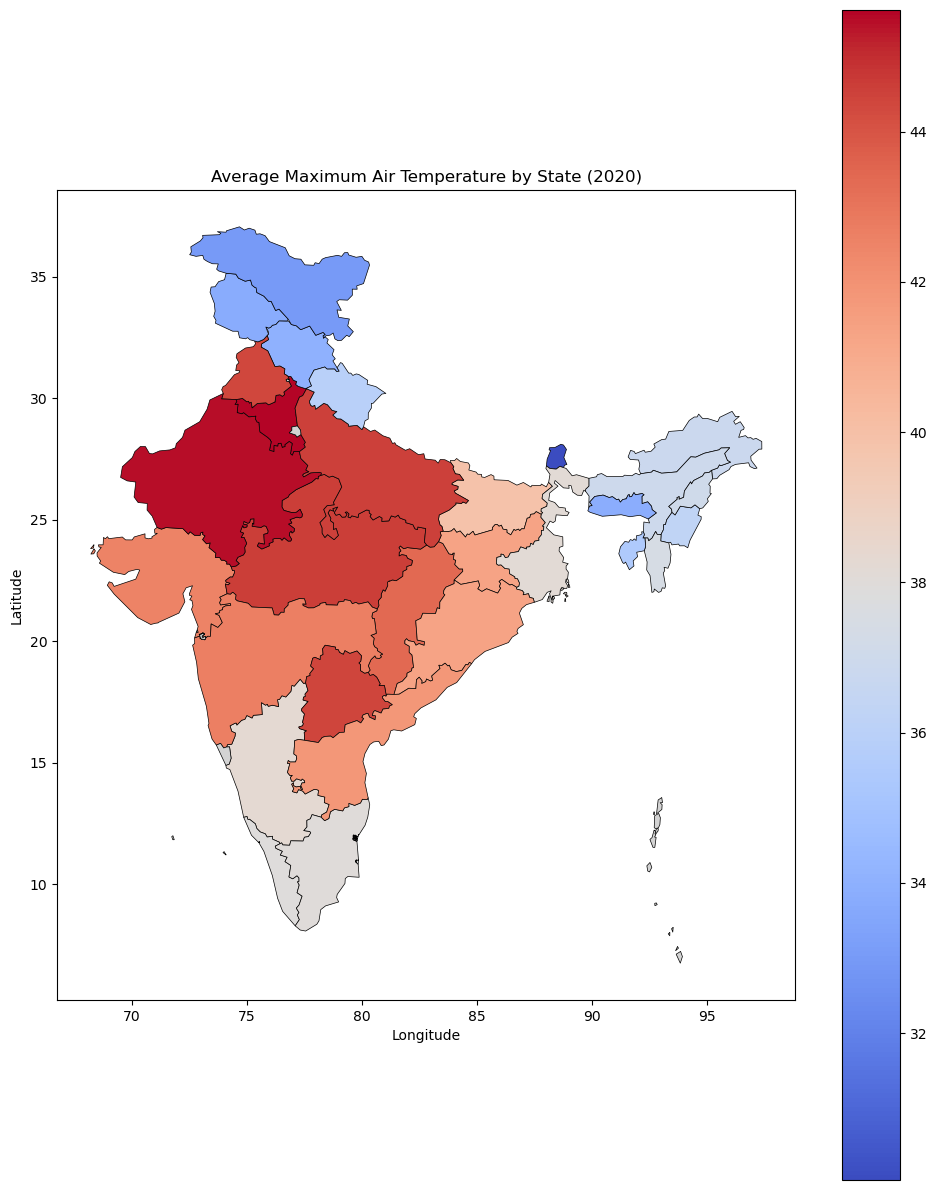

In [8]:
from shapely.geometry import Point

# Load India states shapefile
fp = '/Users/yifuding/Desktop/India_project_data/India_shape/india-polygon.shp'
States = gpd.read_file(fp).to_crs(epsg=4326)

# Step 1: Convert air_temperature into a GeoDataFrame
geometry = [Point(xy) for xy in zip(air_temperature['Longitude'], air_temperature['Latitude'])]
gdf_temp = gpd.GeoDataFrame(air_temperature, geometry=geometry, crs="EPSG:4326")

# Step 2: Spatial join: assign each point to a state
gdf_joined = gpd.sjoin(gdf_temp, States, how='inner', predicate='intersects')

# Step 3: Group by state and compute average temperature
# Assume state name is in a column like 'STATE_NAME' (adjust as per your shapefile)
avg_temp_by_state = gdf_joined.groupby('st_nm')['Maximum Temperature'].mean().reset_index()

# Step 4: Merge back into States GeoDataFrame
States_avg = States.merge(avg_temp_by_state, left_on='st_nm', right_on='st_nm', how='left')

# Step 5: Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
States_avg.plot(column='Maximum Temperature', cmap='coolwarm', linewidth=0.5, edgecolor='black',
                legend=True, ax=ax, missing_kwds={"color": "lightgrey", "label": "No data"})

ax.set_title('Average Maximum Air Temperature by State (2020)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()

In [9]:
# save the average temperature by state to a CSV file
avg_temp_by_state.to_csv('average_max_temperature_by_state.csv', index=False)
print(avg_temp_by_state.head())


               st_nm  Maximum Temperature
0     Andhra Pradesh            41.834293
1  Arunachal Pradesh            36.817550
2              Assam            36.963386
3              Bihar            39.890767
4       Chhattisgarh            43.402620
